In [1]:
import pandas as pd       
import numpy as np        
import seaborn as sns    
import matplotlib.pyplot as plt   
from scipy.stats import chi2_contingency   


In [3]:
# Read the dataset into a DataFrame
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

# Inspect the first few rows to make sure the data is loaded correctly
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [7]:
# Check the structure of the crosstab to find the correct column names
print(crosstab.columns)


Index([False, True], dtype='bool', name='isBestSeller')


In [9]:
# Assuming the bestseller column is named `True` or `1` in the crosstab
crosstab_sorted = crosstab.sort_values(by=True, ascending=False)  # Or by=1 if True does not work

# Display the sorted crosstab
print(crosstab_sorted)


isBestSeller                         False     True 
category                                            
Grocery                           0.941865  0.058135
Smart Home Security & Lighting    0.942308  0.057692
Health & Personal Care            0.942314  0.057686
Mobile Phone Accessories          0.957529  0.042471
Power & Hand Tools                0.964661  0.035339
...                                    ...       ...
CD, Disc & Tape Players           1.000000  0.000000
General Music-Making Accessories  1.000000  0.000000
Snowboard Boots                   1.000000  0.000000
Boxes & Organisers                1.000000  0.000000
eBook Readers & Accessories       1.000000  0.000000

[296 rows x 2 columns]


In [11]:
from scipy.stats import chi2_contingency

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['category'], df['isBestSeller']))

# Print the Chi-Square test results
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")


Chi-Square Statistic: 36540.20270061387
p-value: 0.0


In [13]:
# Calculate Cramér's V
n = len(df)  # Anzahl der Datenpunkte
cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))

print(f"Cramér's V: {cramers_v}")


Cramér's V: 0.1222829439760564


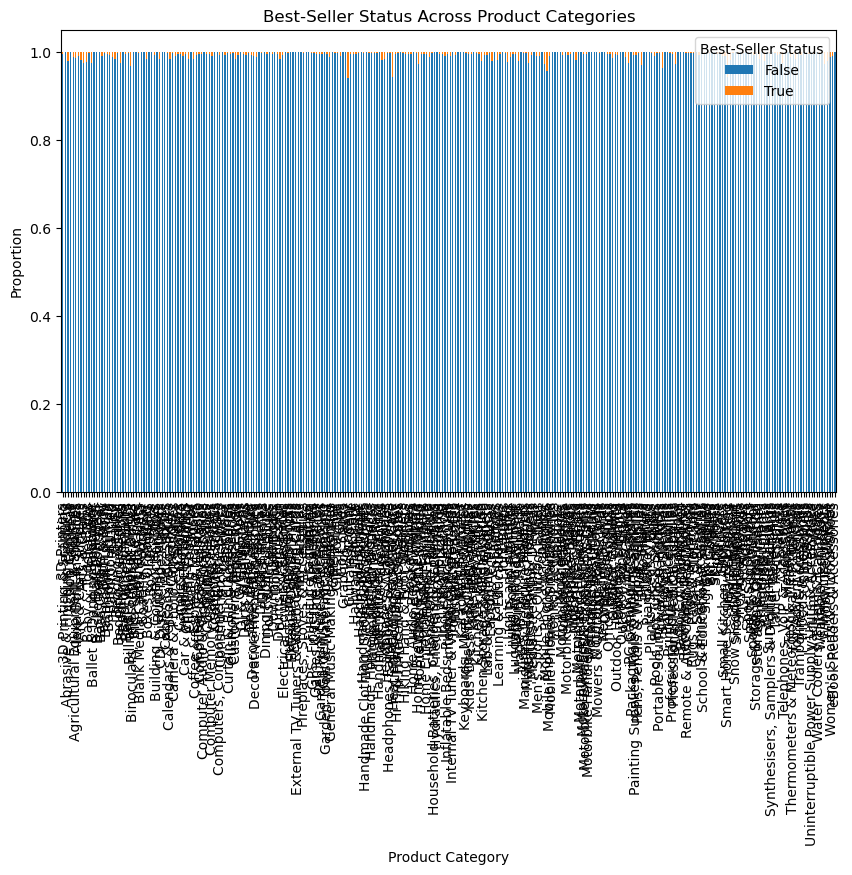

In [15]:
# Plot stacked bar chart for product categories and bestseller status
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Best-Seller Status Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Proportion')
plt.legend(title='Best-Seller Status', loc='upper right')
plt.xticks(rotation=90)
plt.show()


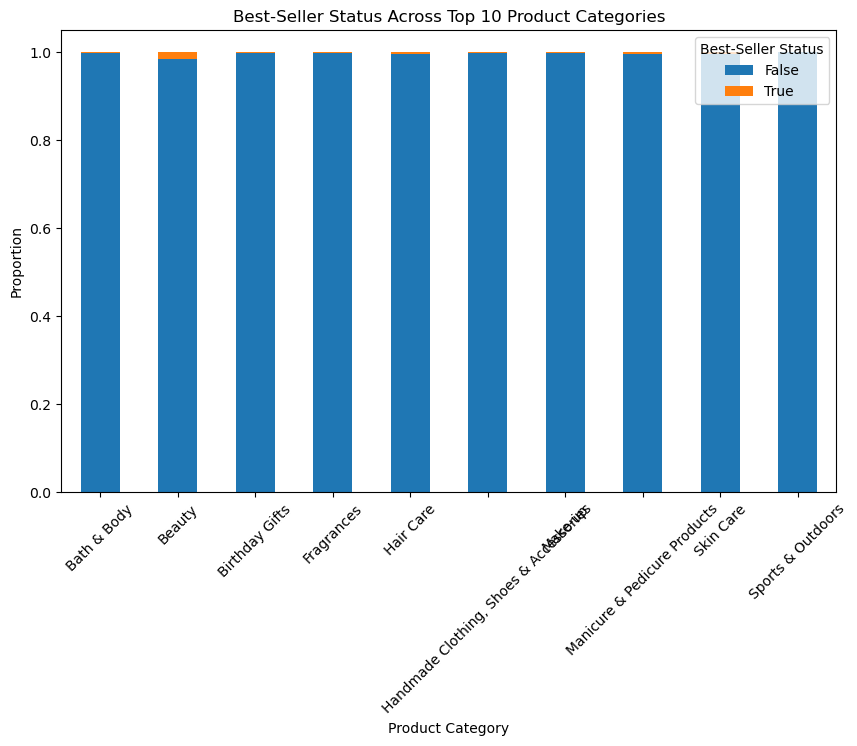

In [17]:
# Filter for the top 10 categories based on the number of products
top_10_categories = df['category'].value_counts().head(10).index

# Create a crosstab for only the top 10 categories
crosstab_top_10 = pd.crosstab(df[df['category'].isin(top_10_categories)]['category'], df['isBestSeller'], normalize='index')

# Plot stacked bar chart for the top 10 categories
crosstab_top_10.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Best-Seller Status Across Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Proportion')
plt.legend(title='Best-Seller Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()


In [19]:
# Calculate IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on price
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Check the shape of the dataset after removing outliers
print(f"Number of products after removing outliers: {df_no_outliers.shape[0]}")


Number of products after removing outliers: 2115963


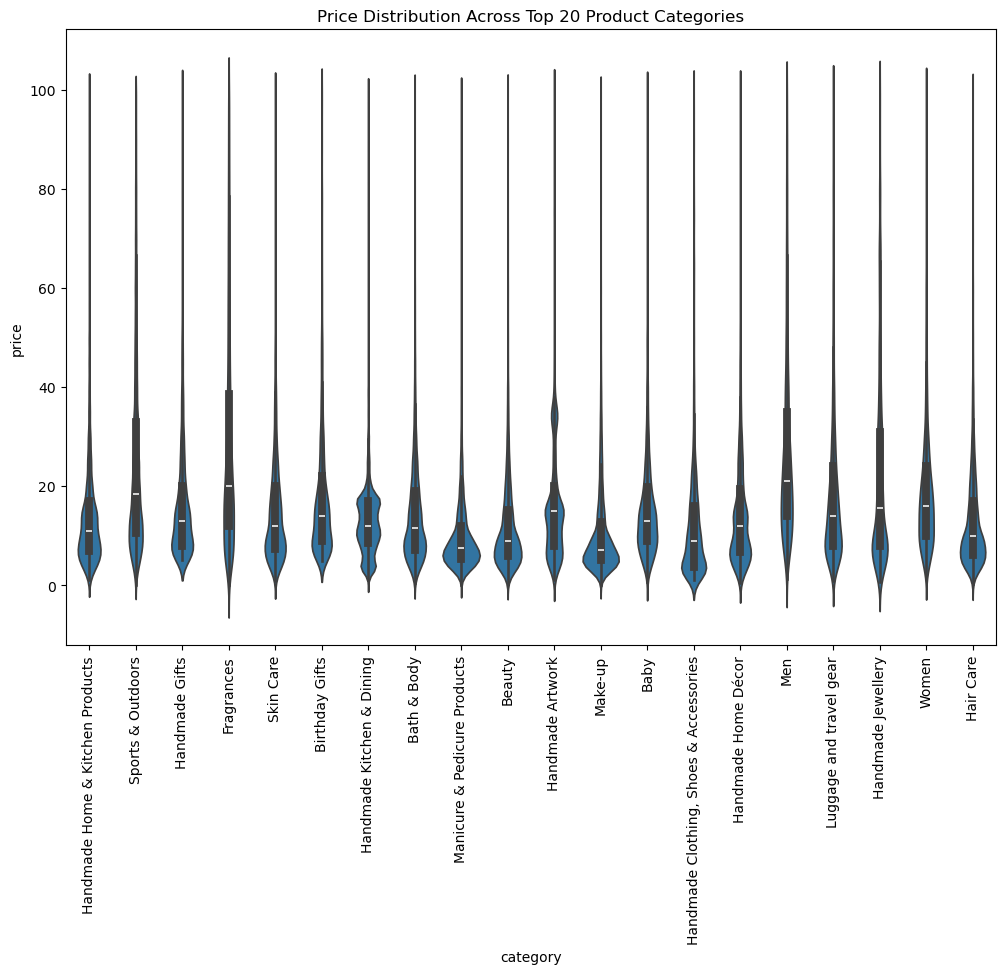

In [21]:
import seaborn as sns

# Filter for the top 20 categories based on the number of products
top_20_categories = df_no_outliers['category'].value_counts().head(20).index

# Create a violin plot for the price distribution across the top 20 categories
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_no_outliers[df_no_outliers['category'].isin(top_20_categories)])
plt.title('Price Distribution Across Top 20 Product Categories')
plt.xticks(rotation=90)
plt.show()


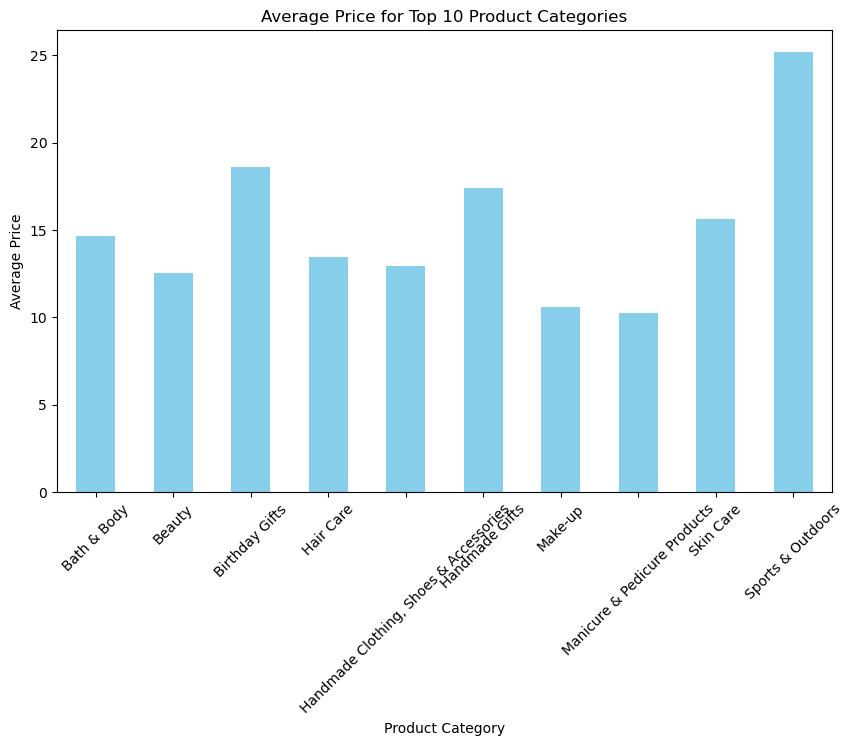

In [23]:
# Calculate the average price for the top 10 categories
top_10_categories = df_no_outliers['category'].value_counts().head(10).index
avg_prices = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)].groupby('category')['price'].mean()

# Plot the average prices as a bar chart
plt.figure(figsize=(10, 6))
avg_prices.plot(kind='bar', color='skyblue')
plt.title('Average Price for Top 10 Product Categories')
plt.ylabel('Average Price')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()

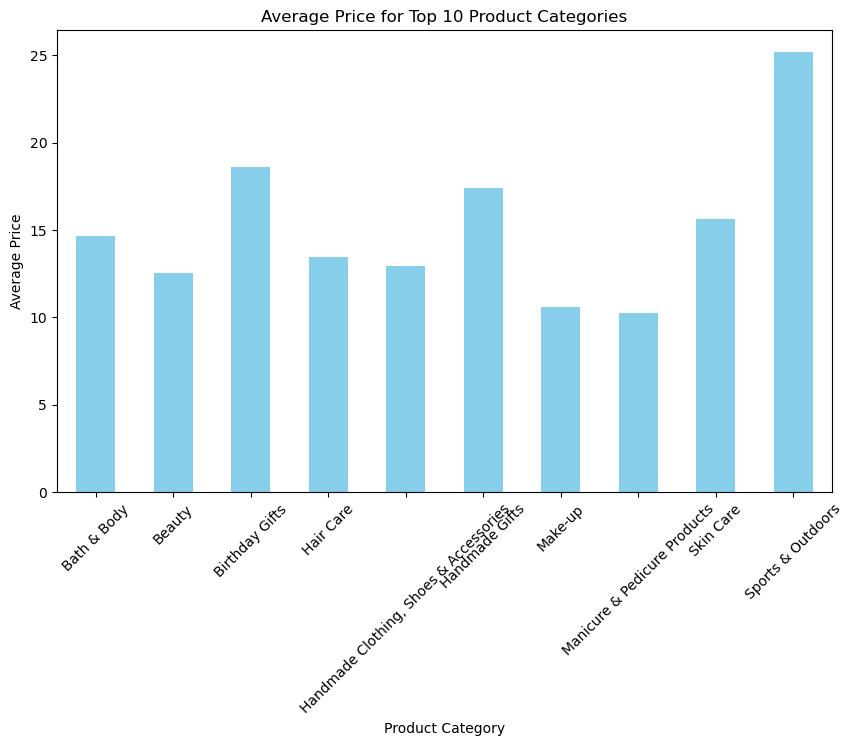

In [25]:
# Calculate the average price for the top 10 categories
top_10_categories = df_no_outliers['category'].value_counts().head(10).index
avg_prices = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)].groupby('category')['price'].mean()

# Plot the average prices as a bar chart
plt.figure(figsize=(10, 6))
avg_prices.plot(kind='bar', color='skyblue')
plt.title('Average Price for Top 10 Product Categories')
plt.ylabel('Average Price')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()


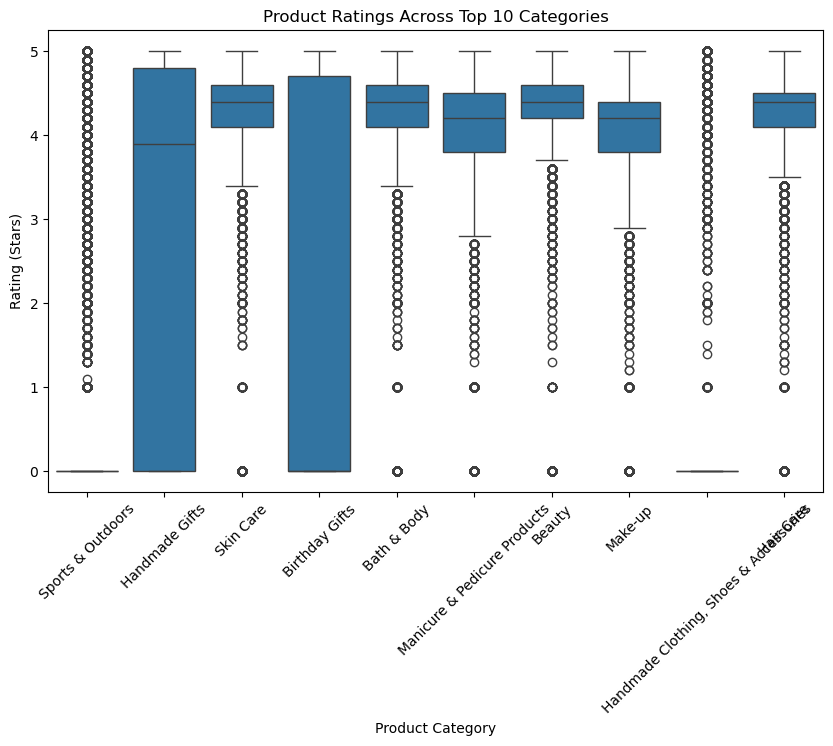

In [27]:
# Create a boxplot for ratings across the top 10 categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='stars', data=df_no_outliers[df_no_outliers['category'].isin(top_10_categories)])
plt.title('Product Ratings Across Top 10 Categories')
plt.ylabel('Rating (Stars)')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()


In [29]:
# Calculate the correlation coefficient between price and stars
correlation = df_no_outliers['price'].corr(df_no_outliers['stars'])

# Print the correlation coefficient
print(f"Correlation between price and rating: {correlation}")


Correlation between price and rating: -0.07767299878181444


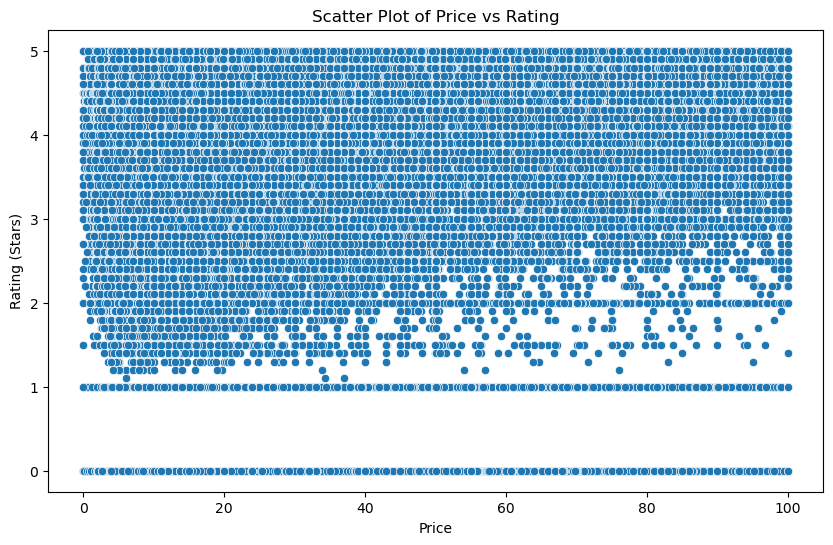

In [31]:
# Plot scatter plot for price and stars
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=df_no_outliers)
plt.title('Scatter Plot of Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating (Stars)')
plt.show()
